In [245]:
import matplotlib.pyplot as plt

##Set PATH
path='/Users/louise/Documents/source/LogFileReader/logging_files_june16/'
fileKinect = 'loggerFile_kinect.txt'

#contains the file broken into a list 
fileListKinect=[]

f2 = open(path+fileKinect, 'r') #Open file in read mode
print('Displaying: ', fileKinect)
for num2, line in enumerate(f2):
    fileListKinect.append(line.split()) #make the list from the file
    print('Line: ', line.split())
f2.close()

Displaying:  loggerFile_kinect.txt
Line:  ['NewSESSION', 'Tue', 'Jun', '6', '09:44:03', '2017']
Line:  ['lightsON', 'Tue', 'Jun', '6', '09:44:03', '2017']
Line:  ['kinectTrackON', 'Tue', 'Jun', '6', '10:43:44', '2017']
Line:  ['kinectTrack', '0.33841', '0.323624', 'Tue', 'Jun', '6', '10:43:44', '2017']
Line:  ['kinectTrack', '0.338513', '0.324086', 'Tue', 'Jun', '6', '10:43:44', '2017']
Line:  ['kinectTrack', '0.338735', '0.324544', 'Tue', 'Jun', '6', '10:43:44', '2017']
Line:  ['kinectTrack', '0.337843', '0.323683', 'Tue', 'Jun', '6', '10:43:44', '2017']
Line:  ['kinectTrack', '0.33727', '0.32289', 'Tue', 'Jun', '6', '10:43:44', '2017']
Line:  ['kinectTrack', '0.337833', '0.322472', 'Tue', 'Jun', '6', '10:43:44', '2017']
Line:  ['kinectTrack', '0.338473', '0.322214', 'Tue', 'Jun', '6', '10:43:44', '2017']
Line:  ['kinectTrack', '0.338794', '0.321364', 'Tue', 'Jun', '6', '10:43:44', '2017']
Line:  ['kinectTrack', '0.338852', '0.321168', 'Tue', 'Jun', '6', '10:43:44', '2017']
Line:  ['k

In [246]:
# look for how many times the lights were turned on / off (kinect)
LightON = 0
LightOFF = 0

if fileKinect.find('kinect') !=-1:
    for num6, strline in enumerate(fileListKinect):
        if len(strline) == 0:
            # do nothing
            x = 1
            
        elif 'lightsON' in strline:
            LightON = LightON + 1
            print(strline[0], 'was turned ON', strline[1], 'at', strline[4])
            
        elif 'lightsOFF' in strline:
            LightOFF = LightOFF + 1
            print(strline[0], 'was turned OFF', strline[1], 'at', strline[4])

print('Lights ON: ', LightON)
print('Lights OFF: ', LightOFF)

lightsON was turned ON Tue at 09:44:03
lightsOFF was turned OFF Tue at 10:49:23
lightsON was turned ON Tue at 10:49:24
lightsOFF was turned OFF Tue at 10:49:25
lightsON was turned ON Tue at 10:49:26
lightsOFF was turned OFF Tue at 10:49:27
lightsON was turned ON Tue at 10:49:27
lightsOFF was turned OFF Tue at 10:49:29
lightsON was turned ON Tue at 10:49:30
lightsOFF was turned OFF Tue at 10:49:31
lightsON was turned ON Tue at 11:04:55
lightsOFF was turned OFF Tue at 11:04:56
lightsON was turned ON Tue at 11:25:59
lightsOFF was turned OFF Tue at 11:30:13
lightsON was turned ON Tue at 11:41:18
lightsOFF was turned OFF Tue at 11:41:29
lightsON was turned ON Tue at 11:56:58
lightsON was turned ON Tue at 12:30:10
lightsOFF was turned OFF Tue at 12:30:10
lightsON was turned ON Tue at 14:24:38
lightsOFF was turned OFF Tue at 14:50:08
lightsON was turned ON Tue at 14:50:08
lightsOFF was turned OFF Tue at 14:50:09
lightsON was turned ON Tue at 17:14:50
lightsOFF was turned OFF Tue at 17:39:11
l

In [247]:
# look for how many times the lights were moved (kinect)
LightMoved = 0
lastResult = 0
lastDay = 0
lastTime = 0

listOfMovementsKinectX = []
listOfMovementsKinectY = []
listOfMovementsKinectT = []
tempListX = []
tempListY = []
tempListT = []

if fileKinect.find('kinect') !=-1:
    for num7, strline in enumerate(fileListKinect):
        if len(strline) == 0:
            # do nothing
            x = 1
        elif 'kinectTrackON' in strline:
            print('tracking ON')
        elif 'kinectTrackOFF' in strline:
            print('tracking OFF')
        # ['kinectTrack', '0.620247', '0.386224', 'Wed', 'Apr', '5', '10:38:01', '2017']
        elif 'kinectTrack' in strline:
            t = strline[6]
            (h, m, s) = t.split(':')
            result = int(h) * 3600 + int(m) * 60 + int(s)
            #print('time in seconds: ', result)
            #print('moved on, day: ', strline[3], ' time: ', strline[6], ' dif: ', (result-lastTime))
            if lastTime == 0: # first time, so need to initialize variables
                lastDay = strline[3]
                lastResult = result
                lastTime = strline[6]
                print('light moved for first time in file: ', lastTime)
                print('light moved ++: ', (result-lastResult), ' day: ', strline[3], ' time: ', strline[6])
            elif (result - lastResult) < 20 and (result - lastResult) > -1:
                lastDay = strline[3]
                lastResult = result
                lastTime = strline[6]
                #print('still in same movement')
            else: 
                # save the list of the movedment 
                listOfMovementsKinectX.append(tempListX)
                listOfMovementsKinectY.append(tempListY)
                listOfMovementsKinectT.append(tempListT)
                # empty the lists
                tempListX = [] 
                tempListY = []
                tempListT = []
                # count at end of movement
                LightMoved = LightMoved + 1
                print('light moved ++: ', (result-lastResult), ' day: ', strline[3], ' time: ', strline[6])
                lastDay = strline[3]
                lastResult = result
                lastTime = strline[6]
            tempListX.append(strline[1])
            tempListY.append(strline[2])
            tempListT.append(result)
            
listOfMovementsKinectX.append(tempListX)
listOfMovementsKinectY.append(tempListY)
listOfMovementsKinectT.append(tempListT)

print('light moved ++: ', lastResult, ' day: ', lastDay, ' time: ', lastTime)
print('Lights moved: ', LightMoved+1) # will not have counted last one
print('Length of movement list: ', len(listOfMovementsKinectX))

tracking ON
light moved for first time in file:  10:43:44
light moved ++:  0  day:  Tue  time:  10:43:44
tracking OFF
tracking ON
light moved ++:  40  day:  Tue  time:  10:45:10
tracking OFF
tracking ON
light moved ++:  230  day:  Tue  time:  10:49:02
tracking OFF
tracking ON
tracking OFF
tracking ON
tracking OFF
tracking ON
tracking OFF
tracking ON
light moved ++:  22  day:  Tue  time:  10:49:59
tracking OFF
tracking ON
light moved ++:  2162  day:  Tue  time:  11:26:04
tracking OFF
tracking ON
light moved ++:  2029  day:  Tue  time:  11:59:58
tracking OFF
tracking ON
tracking OFF
tracking ON
tracking OFF
tracking ON
tracking OFF
tracking ON
tracking OFF
tracking ON
light moved ++:  14277  day:  Wed  time:  15:58:00
tracking OFF
tracking ON
light moved ++:  -6704  day:  Mon  time:  14:06:26
tracking OFF
tracking ON
tracking OFF
tracking ON
light moved ++:  -22045  day:  Tue  time:  07:59:20
tracking OFF
tracking ON
light moved ++:  4917  day:  Tue  time:  09:21:38
light moved ++:  48  

i:  0
Length X:  884
Length Y:  884
Length T:  884


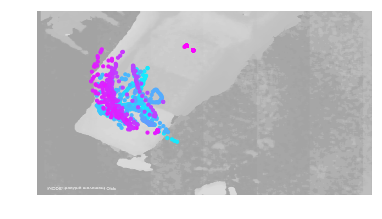

i:  1
Length X:  74
Length Y:  74
Length T:  74


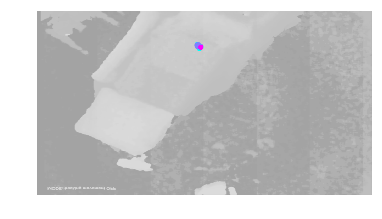

i:  2
Length X:  668
Length Y:  668
Length T:  668


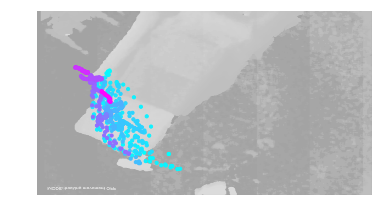

i:  3
Length X:  63
Length Y:  63
Length T:  63


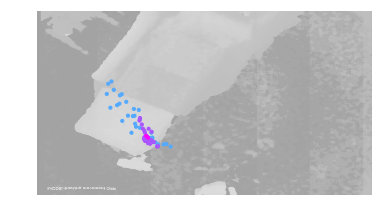

i:  4
Length X:  162
Length Y:  162
Length T:  162


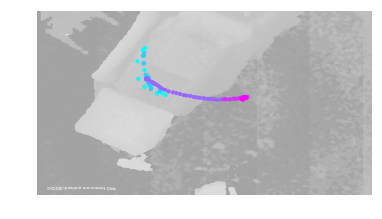

i:  5
Length X:  147
Length Y:  147
Length T:  147


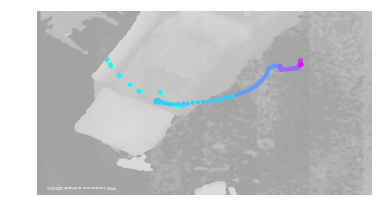

i:  6
Length X:  301
Length Y:  301
Length T:  301


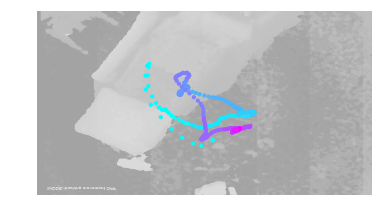

i:  7
Length X:  390
Length Y:  390
Length T:  390


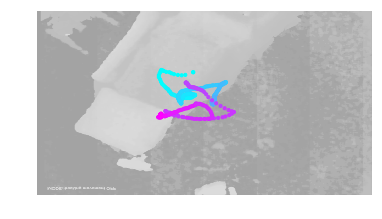

i:  8
Length X:  608
Length Y:  608
Length T:  608


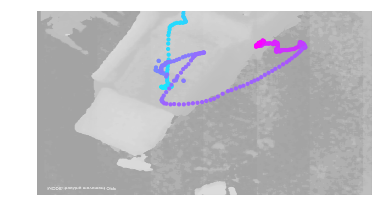

i:  9
Length X:  30
Length Y:  30
Length T:  30


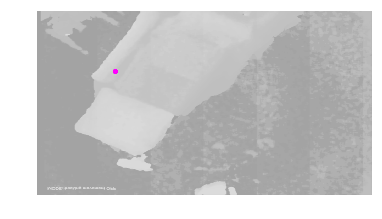

i:  10
Length X:  155
Length Y:  155
Length T:  155


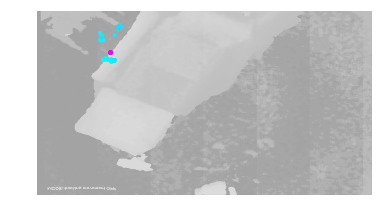

i:  11
Length X:  60
Length Y:  60
Length T:  60


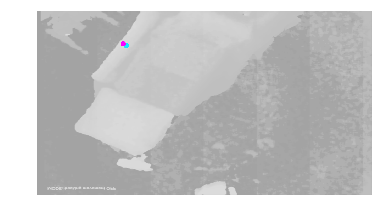

i:  12
Length X:  30
Length Y:  30
Length T:  30


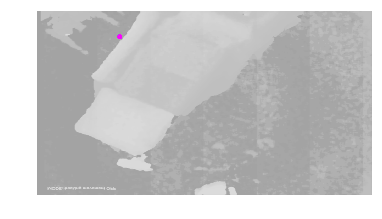

i:  13
Length X:  30
Length Y:  30
Length T:  30


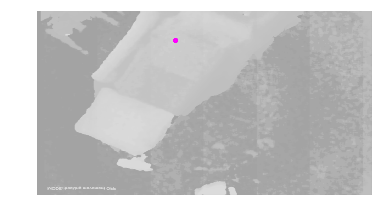

i:  14
Length X:  30
Length Y:  30
Length T:  30


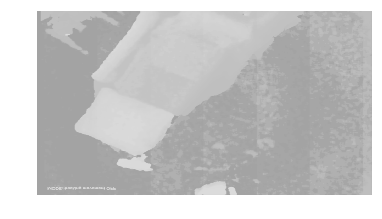

i:  15
Length X:  257
Length Y:  257
Length T:  257


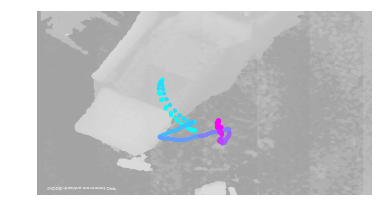

i:  16
Length X:  426
Length Y:  426
Length T:  426


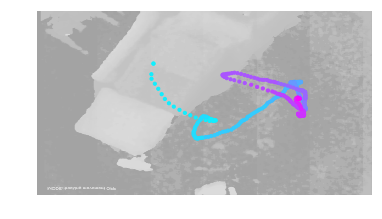

i:  17
Length X:  15195
Length Y:  15195
Length T:  15195


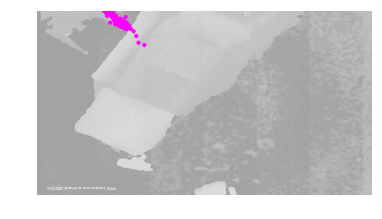

i:  18
Length X:  504
Length Y:  504
Length T:  504


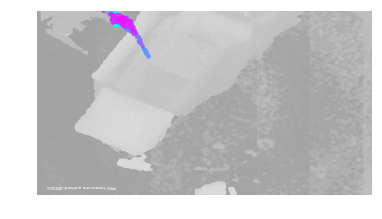

i:  19
Length X:  142
Length Y:  142
Length T:  142


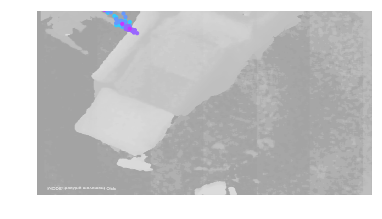

i:  20
Length X:  1400
Length Y:  1400
Length T:  1400


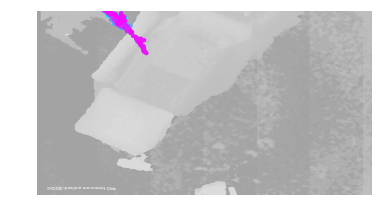

i:  21
Length X:  208
Length Y:  208
Length T:  208


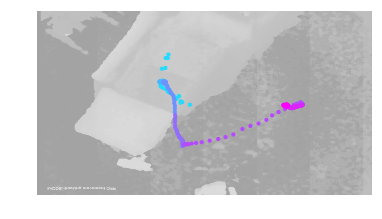

i:  22
Length X:  49
Length Y:  49
Length T:  49


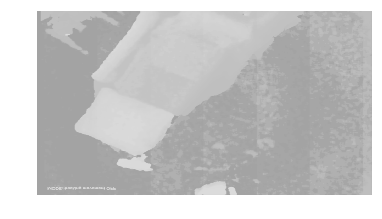

i:  23
Length X:  128
Length Y:  128
Length T:  128


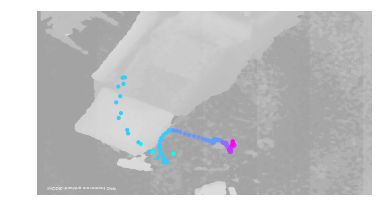

i:  24
Length X:  1188
Length Y:  1188
Length T:  1188


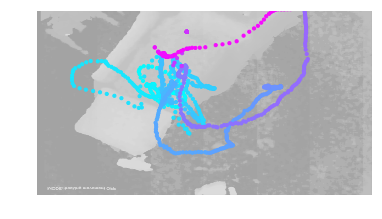

i:  25
Length X:  2718
Length Y:  2718
Length T:  2718


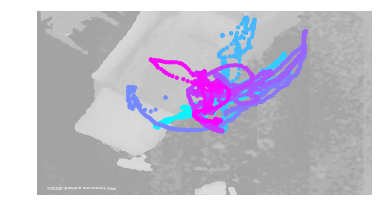

i:  26
Length X:  777
Length Y:  777
Length T:  777


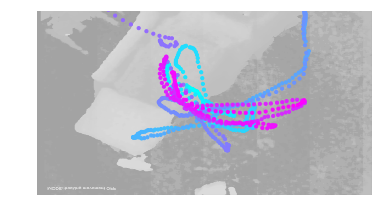

i:  27
Length X:  767
Length Y:  767
Length T:  767


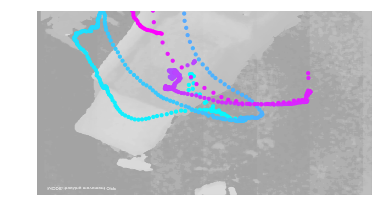

i:  28
Length X:  2036
Length Y:  2036
Length T:  2036


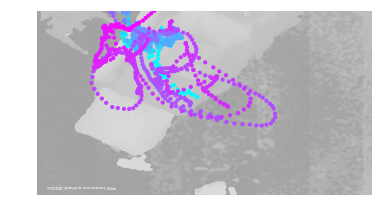

i:  29
Length X:  872
Length Y:  872
Length T:  872


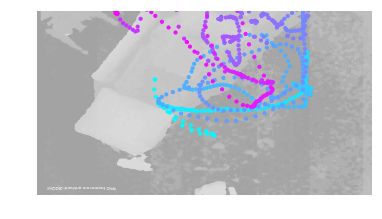

In [248]:
if fileKinect.find('kinect') !=-1:
    for i, movementX in enumerate(listOfMovementsKinectX):
        image_name = '/Users/louise/Documents/source/LogFileReader/pic/kinectimg.png'
        im = plt.imread(image_name)
        implot = plt.imshow(im, extent=[0.15, 0.75, 0.17, 0.5])
        print('i: ', i)
        print('Length X: ', len(listOfMovementsKinectX[i]))
        print('Length Y: ', len(listOfMovementsKinectY[i]))
        print('Length T: ', len(listOfMovementsKinectT[i]))
        plt.scatter(listOfMovementsKinectX[i], listOfMovementsKinectY[i], c=listOfMovementsKinectT[i], s=10, cmap='cool')
        axes = plt.gca()
        axes.set_xlim([0.15,0.75])
        axes.set_ylim([0.17,0.5])
        plt.axis('off')
        plt.show()